---
---

<img src="logo_univ.png" width=250px align="right"></span>

# <span style="background-color: "> **_Modélisation des prix dans      le secteur de l'immobilier à Lyon_** </span>

### **_Projet introduction au Machine Learning en Python | Partie 1 : Analyse Exploratoire_**

Jeudi 2 Juin 2022

##### <div style="text-align:right;">Projet réalisé par : Gaoussou Diakité, Abir Khan, Anis Louissi, Camil Zahi</div>
<div style="text-align:right;">Sous la direction de : Guillaume Clement & Paul Thavenot </div>

---
---

<h3><center>Définition de l’objectif</center></h3>
Dans cette section, nous vous définissons le problème dont nous allons faire face et la mission qu'on va se fixer à travers ce projet.
<br><br>
AirBnB est une place de marché pour des locations de courte durée qui permet de lister tous les logements et les mettre en location.
<br>
On peut y retrouver tout type de logement, du studio à la maison en passant par l'appartement et parce que ces locations s'avèrent de courte durée, Airbnb a énormément grossi à tel point qu'il concurrence maintenant les hôtels là où il est devenu une vraie alternative.
<br>
La société fondée en 2008 a une valorisation supérieure à 31 milliards de dollars, bien plus que n'importe quelle chaîne d'hôtel tout en ne possédant aucun hôtel.
<br><br>
Un des défis que doivent affronter les propriétaires qui cherchent donc à louer leur logement, consiste à déterminer le prix optimal du loyer pour une nuit dans de nombreuses zones géographiques.
<br>
Les clients se voient proposer un bon nombre d'annonces et peuvent filtrer selon des critères tels que : le prix, le nombre de chambres à coucher, le type de chambre…
<br>
Comme Airbnb est une place de marché, le montant qu'un propriétaire peut facturer chaque nuit est étroitement liée à la dynamique du marché.
Ce qui va nous intéresser dans notre projet, c'est le prix par nuit en tant que propriétaire.
<br>
Si nous essayons de facturer une location au-dessus du prix de marché, les locataires choisiront des alternatives plus abordables et similaires au nôtre. A l’inverse, si nous fixons notre loyer à la nuit trop bas, notre revenu potentiel baissera.
<br>

Ainsi, la stratégie que nous utiliserons consistera à :
- trouver quelques annonces similaires aux nôtres ;
- faire la moyenne du prix indiqué pour les annonces les plus similaires au nôtre ;
- fixer notre prix de location à ce prix moyen calculé.
<br>

Le processus de découverte de modèles dans les données existantes pour effectuer une prédiction peut être appelé machine learning.
<br>
**Dans notre cas nous souhaitons utiliser les données des locations locales pour prévoir le prix optimal à définir.**
<br>
Pour répondre à ce besoin, nous explorerons plusieurs techniques de machine learning spécifiques, mais avant de rentrer plus en détail dans le machine learning et plus spécifiquement de l'algorithme, nous allons nous familiariser avec le dataset avec lequel nous allons travailler qui contiendra bien sûr une liste de logements mis en location sur Airbnb.

Lien vers le site de récupération des données (Lyon - Mars 2022) : http://insideairbnb.com/get-the-data/

---

In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

---
<h3><center> Les données </center></h3>

In [2]:
# Lecture de la base de données
df0 = pd.read_excel("lyon_airbnb.xlsx")

In [3]:
# Affichage du dataframe
df0.sample(n=10, random_state=14)

,name,description,neighborhood_overview,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
366,Appartement 110m avec vue superbe,Appartement 110m2 au 8Ã¨me Ã©tage situÃ© juste...,NaN,"Lyon, Rhone-Alpes, France",NaN,NaN,NaN,NaN,f,7th Arrondissement,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
3476,Appartement calme et lumineux.,Apparemment trÃ¨s lumineux et calme.<br />IdÃ©...,NaN,"Saint-Paul-Trois-ChÃ¢teaux, Rhone-Alpes, France",NaN,NaN,NaN,NaN,f,9th Arrondissement,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
3744,Lumineuse chambre proche Part Dieu/Cours Lafay...,Lumineuse chambre secteur Cours Lafayette - Ly...,Quartier trÃ¨s calme. <br />A dix minutes du m...,"Villeurbanne, Auvergne-RhÃ´ne-Alpes, France",Superhost lyonnais depuis 2017,within an hour,1.00,0.82,t,NaN,...,3.0,4.96,4.96,5.00,4.95,4.93,4.77,4.92,f,6.42
279,Very centrally located apartment,Located 1 minute walk from the Rhone river & w...,NaN,"Lyon, Auvergne-RhÃ´ne-Alpes, France",NaN,NaN,NaN,NaN,f,7th Arrondissement,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
529,Bellecour - Appartement meublÃ©,"Au centre de Lyon, Ã proximitÃ© de la Place B...","L'appartement est situÃ© sur la Presqu'Ã®le, q...","Lyon, Auvergne-RhÃ´ne-Alpes, France",........,within a day,0.72,0.79,f,2nd Arrondissement,...,1.0,4.53,4.73,4.53,4.70,4.60,4.90,4.53,f,0.48
4237,T2 trÃ¨s bien Ã©quipÃ©,<b>The space</b><br />L appartement est Ã l e...,Nombreux commerce de proximitÃ©. <br />Boulang...,"DÃ©cines-Charpieu, Auvergne-RhÃ´ne-Alpes, France",NaN,NaN,NaN,0.00,f,8th Arrondissement,...,0.0,4.40,4.67,4.60,4.80,4.87,4.47,4.47,f,0.93
1355,La Capitainerie,Appartement duplex de 78 m2<br />Avec 2 chambr...,NaN,FR,NaN,NaN,NaN,NaN,f,3rd Arrondissement,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
2930,The TinyHouseâœ¨,Jolie studio accueillant et pratique au coeur ...,NaN,"Lyon, Auvergne-RhÃ´ne-Alpes, France",NaN,within an hour,0.95,0.87,f,NaN,...,1.0,4.56,4.82,4.40,4.97,4.96,4.63,4.49,f,2.39
385,Chambre fÃªte des lumiÃ¨res !,Je loue une chambre dans un appartement sous l...,NaN,"Lyon, Rhone-Alpes, France",NaN,NaN,NaN,NaN,f,NaN,...,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,0.01
2496,chambre d'hÃ´te pentes de croix rousse,appartement avec terrasse donnant sur jardin,NaN,FR,NaN,NaN,NaN,NaN,f,1st Arrondissement,...,0.0,5.00,4.50,4.50,4.50,4.50,5.00,4.50,f,0.04


In [4]:
# Copie du dataframe
df = df0.copy()

---
<h3><center> Structure des données </center></h3>

In [5]:
# Description du jeu de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         6734 non-null   object 
 1   description                  6625 non-null   object 
 2   neighborhood_overview        3456 non-null   object 
 3   host_location                6712 non-null   object 
 4   host_about                   1550 non-null   object 
 5   host_response_time           2698 non-null   object 
 6   host_response_rate           2698 non-null   float64
 7   host_acceptance_rate         3439 non-null   float64
 8   host_is_superhost            6736 non-null   object 
 9   host_neighbourhood           4128 non-null   object 
 10  host_listings_count          6736 non-null   float64
 11  host_total_listings_count    6736 non-null   float64
 12  host_verifications           6736 non-null   object 
 13  host_has_profile_p

In [6]:
# Taux de valeurs manquantes 
taux_de_nAn = round((df.isna().sum()*100/df.shape[0]).sort_values(ascending=True),2)
taux_de_nAn

host_verifications              0.00
minimum_nights                  0.00
instant_bookable                0.00
accommodates                    0.00
room_type                       0.00
property_type                   0.00
longitude                       0.00
latitude                        0.00
neighbourhood_cleansed          0.00
maximum_nights                  0.00
host_identity_verified          0.00
host_has_profile_pic            0.00
amenities                       0.00
host_total_listings_count       0.00
host_listings_count             0.00
has_availability                0.00
host_is_superhost               0.00
availability_30                 0.00
availability_60                 0.00
availability_90                 0.00
availability_365                0.00
number_of_reviews               0.00
number_of_reviews_ltm           0.00
number_of_reviews_l30d          0.00
price                           0.00
name                            0.03
bathrooms_text                  0.06
h

<AxesSubplot:>

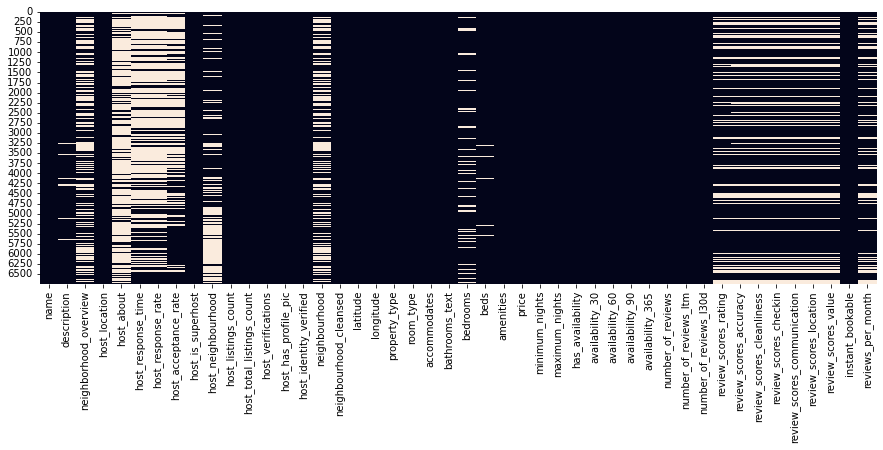

In [7]:
# Visualisation des valeurs manquantes
plt.figure(figsize=(15,5))
sns.heatmap(df.isna(), cbar=False)

In [8]:
# Suppression des colonnes où on a plus de 50% de valeurs manquantes
df = df[df.columns[df.isna().sum()/df.shape[0] <0.5]]
df.shape

(6736, 43)

In [9]:
# Colonnes du dataframe
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_location',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

In [10]:
# Nouveau dataframe avec les colonnes aux données intéressantes
list_colonnes_intiales = ['price','neighbourhood_cleansed','latitude','longitude','room_type','accommodates','bedrooms','beds','bathrooms_text','amenities','host_is_superhost','review_scores_rating','number_of_reviews']
df = df.reindex(columns=['price','neighbourhood_cleansed','latitude','longitude','room_type','accommodates','bedrooms','beds','bathrooms_text','amenities','host_is_superhost','review_scores_rating','number_of_reviews'])

In [11]:
# Affichage du dataframe
df.sample(n=1, random_state=134)

,price,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,bathrooms_text,amenities,host_is_superhost,review_scores_rating,number_of_reviews
3387,$35.00,3e Arrondissement,45.75925,4.84129,Entire home/apt,2.0,1.0,1.0,1 bath,"[""Dryer"", ""Essentials"", ""Iron"", ""Long term sta...",f,5.0,1.0


---
<h3><center>Introduction au Dataset</center></h3>

- **price** : _prix par nuit_
- **neighbourhood_cleansed** : _localisation du logement (quartier/nom d'arrondissement)_
- **latitude** : _coordonnée géographique qui spécifie la position nord-sud du bien_
- **longitude** : _coordonnée géographique qui spécifie la position est-ouest du bien_
- **room_type** : _type de logement_
- **accommodates** : _nombre d'invités que peut accueillir le logement_
- **bedrooms** : _nombre de chambres dans le logement_
- **beds** : _nombre de lits dans le logement_
- **bathrooms_text** : _nombre de salles de bain dans le logement_
- **amenities** : composants présents dans le logement     
- **host_is_superhost** : _badge  d'un hote qui par ses mises en locations antérieures a été reconnu comme un hote de qualité_
- **review_scores_rating** : _note moyenne sur 5_
- **number_of_reviews** : _nombre d'avis laissés par les utilisateurs_

In [12]:
# Renommer les colonnes
df = df.rename({"price":"Prix par nuit",
                "neighbourhood_cleansed":"Localisation",
                "latitude":"Latitude",
                "longitude":"Longitude",
                "room_type":"Type",
                "accommodates":"Nombre d'invités",
                "bedrooms":"Nombre de chambres",
                "beds":"Nombre de lits",
                "bathrooms_text":"Nombre de salles de bain",
                "amenities":"Autres composants",
                "host_is_superhost":"Badge hote de qualité",
                "review_scores_rating":"Note moyenne sur 5",
                "number_of_reviews":"Nombre d'avis"}, 
               axis='columns')

In [13]:
# Affichage du dataframe
df.sample(n=1, random_state=987)

,Prix par nuit,Localisation,Latitude,Longitude,Type,Nombre d'invités,Nombre de chambres,Nombre de lits,Nombre de salles de bain,Autres composants,Badge hote de qualité,Note moyenne sur 5,Nombre d'avis
3027,$75.00,1er Arrondissement,45.76768,4.83464,Entire home/apt,4.0,1.0,2.0,1 bath,"[""Cooking basics"", ""Wifi"", ""Kitchen"", ""Hangers...",f,5.0,2.0


In [14]:
# Dimension du df
print(f"La base de données fait {df.shape[0]} lignes et {df.shape[1]} colonnes")

La base de données fait 6736 lignes et 13 colonnes


---
<h3><center>Nettoyage</center></h3>

In [15]:
# Vérification de la présence de doublons
df.duplicated().sum()
# Il n'y a aucun doublon, hors le scraping est régulièrement mis à jour donc il est possible qu'on retrouve 2 fois le même appartement avec des différences notamment au niveau de la note et du nombre de commentaires

0

In [16]:
# Analyse des doublons potentiels
features_analyze_duplicates = ['Localisation', 'Prix par nuit', 'Latitude', 'Longitude']
# On prend des variables déterminentes afin de voir s'il a'agit vraiment de mêmes appartements
df[df.duplicated(subset = features_analyze_duplicates, keep=False)].sort_values(by='Latitude').iloc[0:50,:]

,Prix par nuit,Localisation,Latitude,Longitude,Type,Nombre d'invités,Nombre de chambres,Nombre de lits,Nombre de salles de bain,Autres composants,Badge hote de qualité,Note moyenne sur 5,Nombre d'avis
3770,$22.00,5e Arrondissement,45.747680,4.787520,Private room,1.0,1.0,1.0,1 shared bath,"[""TV"", ""Essentials"", ""Lock on bedroom door"", ""...",t,4.92,63.0
4018,$22.00,5e Arrondissement,45.747680,4.787520,Private room,1.0,1.0,1.0,1 shared bath,"[""TV"", ""Essentials"", ""Lock on bedroom door"", ""...",t,4.85,33.0
4015,$49.00,3e Arrondissement,45.753460,4.890430,Entire home/apt,2.0,NaN,1.0,1 bath,"[""TV"", ""Hot water kettle"", ""Cleaning products""...",f,4.69,131.0
4047,$49.00,3e Arrondissement,45.753460,4.890430,Entire home/apt,2.0,NaN,1.0,1 bath,"[""TV"", ""Essentials"", ""Hair dryer"", ""Microwave""...",f,4.71,134.0
5595,$77.00,3e Arrondissement,45.756699,4.849429,Entire home/apt,2.0,1.0,1.0,1 bath,"[""TV"", ""Essentials"", ""Microwave"", ""Coffee make...",f,3.50,20.0
5599,$77.00,3e Arrondissement,45.756699,4.849429,Entire home/apt,2.0,1.0,1.0,1 bath,"[""TV"", ""Essentials"", ""Microwave"", ""Coffee make...",f,4.10,31.0
3019,$65.00,3e Arrondissement,45.756880,4.866450,Entire home/apt,4.0,1.0,2.0,1 bath,"[""Long term stays allowed"", ""Essentials"", ""Hai...",f,4.60,162.0
3025,$65.00,3e Arrondissement,45.756880,4.866450,Entire home/apt,4.0,1.0,2.0,1 bath,"[""Dedicated workspace"", ""Shampoo"", ""TV"", ""Wifi...",f,4.59,138.0
2394,$46.00,3e Arrondissement,45.758780,4.851820,Entire home/apt,2.0,NaN,1.0,1 bath,"[""TV"", ""Essentials"", ""Hair dryer"", ""Microwave""...",f,4.71,334.0
3203,$46.00,3e Arrondissement,45.758780,4.851820,Entire home/apt,2.0,NaN,1.0,1 bath,"[""TV"", ""Essentials"", ""Hair dryer"", ""Microwave""...",f,4.66,189.0


##### Pas d'informations suffisantes pour conclure sur le fait qu'ils s'agissent de vrais doublons

In [17]:
# Taux de valeurs manquantes 
taux_de_nAn = round((df.isna().sum()*100/df.shape[0]).sort_values(ascending=True),2)
taux_de_nAn

Prix par nuit                0.00
Localisation                 0.00
Latitude                     0.00
Longitude                    0.00
Type                         0.00
Nombre d'invités             0.00
Autres composants            0.00
Badge hote de qualité        0.00
Nombre d'avis                0.00
Nombre de salles de bain     0.06
Nombre de lits               1.75
Nombre de chambres          12.75
Note moyenne sur 5          22.82
dtype: float64

In [18]:
# Types de variables
df.dtypes

Prix par nuit                object
Localisation                 object
Latitude                    float64
Longitude                   float64
Type                         object
Nombre d'invités            float64
Nombre de chambres          float64
Nombre de lits              float64
Nombre de salles de bain     object
Autres composants            object
Badge hote de qualité        object
Note moyenne sur 5          float64
Nombre d'avis               float64
dtype: object

In [19]:
# Nombre de valeurs uniques par variables
print(df.nunique())

Prix par nuit                291
Localisation                   9
Latitude                    3746
Longitude                   4321
Type                           4
Nombre d'invités              15
Nombre de chambres             8
Nombre de lits                12
Nombre de salles de bain      19
Autres composants           6192
Badge hote de qualité          2
Note moyenne sur 5           134
Nombre d'avis                304
dtype: int64


En regardant sur le site : https://fr.exchangerates.org.uk/historiques/USD-EUR.html,
<br>
au 9 Mars 2022 : 1 USD = 0.9032 EUR

In [20]:
# Nettoyage Prix
df['Prix par nuit'] = df['Prix par nuit'].str.replace('$','',regex=True)
df['Prix par nuit'] = df['Prix par nuit'].str.replace(',','',regex=True)
df['Prix par nuit'] = df['Prix par nuit'].astype(float)
df['Prix par nuit'] = round(df['Prix par nuit']*0.9032,2)

In [21]:
# Nettoyage Localisation
df['Localisation'] = df['Localisation'].str[0]

In [22]:
# Nettoyage Latitude

# Pas de nettoyage !

In [23]:
# Nettoyage Longitude

# Pas de nettoyage !

In [24]:
# Nettoyage Type  
df['Type'].value_counts()

Entire home/apt    5005
Private room       1652
Shared room          53
Hotel room           26
Name: Type, dtype: int64

In [25]:
# Nettoyage Nombre d'invités
df["Nombre d'invités"] = df["Nombre d'invités"].astype(int)
df["Nombre d'invités"].value_counts()

2     3087
4     1902
3      520
6      437
1      384
5      219
8       94
7       43
10      20
9       11
14       5
13       4
11       4
12       3
16       3
Name: Nombre d'invités, dtype: int64

In [26]:
# Nettoyage Nombre de chambres
df["Nombre de chambres"] = df["Nombre de chambres"].fillna(-1).astype(int)
df["Nombre de chambres"].value_counts()

 1    4351
 2    1106
-1     859
 3     331
 4      61
 5      19
 6       6
 7       2
 8       1
Name: Nombre de chambres, dtype: int64

In [27]:
# Nettoyage Nombre de lits
df["Nombre de lits"] = df["Nombre de lits"].fillna(-1).astype(int)
df["Nombre de lits"].value_counts()

 1     3583
 2     2046
 3      624
 4      233
-1      118
 5       73
 6       27
 7       18
 8       10
 12       1
 9        1
 13       1
 16       1
Name: Nombre de lits, dtype: int64

In [28]:
# Nettoyage Nombre de salles de bain
df["Nombre de salles de bain"].unique()
df["Nombre de salles de bain"].value_counts()
df["Nombre de salles de bain"] = df["Nombre de salles de bain"].fillna(-1)

def nettoyage_nb_salles_de_bain(x):
    if x == '1 private bath' :
        return '1 bath'
    elif x == 'Half-bath':
        return '0.5 bath'
    elif x == '0 baths':
        return '0 bath'
    elif x =='Shared half-bath':
        return '0.5 shared bath'
    elif x =='0 shared baths':
        return '0 bath'
    else:
        return x
df["Nombre de salles de bain"] = df["Nombre de salles de bain"].apply(nettoyage_nb_salles_de_bain)
df["Nombre de salles de bain"].value_counts()

# Distinction salle de bains partagée ou non
df["Type de salle de bain"] = ''
df["Type de salle de bain"] = ['Partagée' if 'shared' in str(x) else 'Individuelle' for x in df["Nombre de salles de bain"]]

# Nombre de salle de bain : uniquement la variable numérique
for feature in df.columns.values:
    if  feature in ['Nombre de salles de bain']:
        df['Nombre de salle de bain'] = df[feature].map({'2 baths': 2, '1 bath':1, '1.5 baths':1.5, '1 shared bath':1, -1:-1, '3 baths':3,'0 bath':0, '0.5 bath':0.5, '1.5 shared baths':1.5,'0.5 shared bath':0.5,'2.5 baths':2.5,'2 shared baths':2,'2.5 shared baths':2.5})
    
df["Nombre de salle de bain"] = df["Nombre de salle de bain"].fillna(-1).astype(int)
df["Nombre de chambres"] = df["Nombre de chambres"].astype(int)
del df["Nombre de salles de bain"]

In [29]:
# Nettoyage Autres composants

# Calcul du nombre de caractéristiques
#df["Nombre de caractéristiques"] = ''

# TOUT METTRE EN MINUSCULE
df["Autres composants"]=df["Autres composants"].str.lower()

# Création de colonnes avec les caractéristiques les plus importantes
df["Wifi"] = ['Oui' if 'wifi' in x else 'Non' for x in df["Autres composants"]]
df["Chauffage"] = ['Oui' if 'heating' in x else 'Non' for x in df["Autres composants"]]
df["Climatisation"] = ['Oui' if 'air conditioning' in x else 'Non' for x in df["Autres composants"]]
df["Ménage"] = ['Oui' if 'cleaning before checkout' in x else 'Non' for x in df["Autres composants"]]
df["Jardin"] = ['Oui' if 'backyard' in x else 'Non' for x in df["Autres composants"]]
df["Terrasse"] = ['Oui' if 'patio or balcony' in x else 'Non' for x in df["Autres composants"]]
df["Parking"] = ['Oui' if 'free parking on premises' in x else 'Non' for x in df["Autres composants"]]
df["Ascenseur"] = ['Oui' if 'elevator' in x else 'Non' for x in df["Autres composants"]]
df["Cuisine"] = ['Oui' if 'kitchen' in x else 'Non' for x in df["Autres composants"]]
df["Micro-ondes"] = ['Oui' if 'microwave' in x else 'Non' for x in df["Autres composants"]]
df["Four"] = ['Oui' if 'oven' in x else 'Non' for x in df["Autres composants"]]
df

,Prix par nuit,Localisation,Latitude,Longitude,Type,Nombre d'invités,Nombre de chambres,Nombre de lits,Autres composants,Badge hote de qualité,...,Chauffage,Climatisation,Ménage,Jardin,Terrasse,Parking,Ascenseur,Cuisine,Micro-ondes,Four
0,108.38,5,45.763120,4.828130,Entire home/apt,6,3,4,"[""crib"", ""tv"", ""essentials"", ""hair dryer"", ""lo...",f,...,Oui,Non,Non,Non,Non,Non,Non,Oui,Non,Non
1,79.48,6,45.769960,4.853320,Entire home/apt,4,1,1,"[""tv"", ""essentials"", ""hair dryer"", ""microwave""...",f,...,Oui,Oui,Non,Non,Oui,Oui,Oui,Oui,Oui,Oui
2,140.90,1,45.766950,4.832410,Entire home/apt,6,3,4,"[""crib"", ""tv"", ""bathtub"", ""essentials"", ""hair ...",t,...,Oui,Non,Non,Non,Non,Non,Oui,Oui,Oui,Oui
3,108.38,3,45.746700,4.870990,Entire home/apt,6,2,2,"[""cooking basics"", ""wifi"", ""kitchen"", ""hangers...",t,...,Oui,Non,Non,Oui,Oui,Oui,Oui,Oui,Oui,Oui
4,62.32,1,45.769830,4.829300,Entire home/apt,2,1,1,"[""tv"", ""essentials"", ""hair dryer"", ""coffee mak...",t,...,Oui,Non,Non,Non,Non,Non,Oui,Oui,Non,Oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731,18.06,8,45.739235,4.877720,Entire home/apt,1,1,1,"[""cleaning products"", ""microwave"", ""long term ...",t,...,Oui,Non,Oui,Oui,Non,Oui,Non,Non,Oui,Non
6732,64.13,2,45.762627,4.831868,Entire home/apt,2,-1,1,"[""tv"", ""elevator"", ""wifi"", ""paid parking off p...",f,...,Oui,Non,Non,Non,Non,Non,Oui,Oui,Oui,Non
6733,43.35,3,45.759235,4.867008,Entire home/apt,4,1,1,"[""tv"", ""wifi"", ""fire extinguisher"", ""washer"", ...",f,...,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Non
6734,93.93,2,45.761377,4.835478,Entire home/apt,4,1,1,"[""tv"", ""hot water kettle"", ""cleaning products""...",f,...,Oui,Oui,Non,Non,Non,Oui,Non,Oui,Oui,Oui


In [30]:
# Nettoyage Badge hote de qualité
df["Badge hote de qualité"] = df["Badge hote de qualité"].str.replace("f","Non")
df["Badge hote de qualité"] = df["Badge hote de qualité"].str.replace("t","Oui")
df["Badge hote de qualité"].value_counts()

Non    5749
Oui     987
Name: Badge hote de qualité, dtype: int64

In [31]:
# Nettoyage Note moyenne sur 5
df["Note moyenne sur 5"] = df["Note moyenne sur 5"].astype(float)
df["Note moyenne sur 5"] = df["Note moyenne sur 5"].fillna(-1)
df["Note moyenne sur 5"].value_counts()

-1.00    1537
 5.00    1519
 4.00     255
 4.50     228
 4.67     176
         ... 
 3.40       1
 4.08       1
 3.17       1
 4.34       1
 4.05       1
Name: Note moyenne sur 5, Length: 135, dtype: int64

In [32]:
# Nettoyage Nombre d'avis 
df["Nombre d'avis"] = df["Nombre d'avis"].astype(int)
df["Nombre d'avis"].value_counts()

0      1537
1       839
2       491
3       337
4       289
       ... 
277       1
213       1
250       1
353       1
251       1
Name: Nombre d'avis, Length: 304, dtype: int64

In [33]:
# Types de variables
df.dtypes

Prix par nuit              float64
Localisation                object
Latitude                   float64
Longitude                  float64
Type                        object
Nombre d'invités             int32
Nombre de chambres           int32
Nombre de lits               int32
Autres composants           object
Badge hote de qualité       object
Note moyenne sur 5         float64
Nombre d'avis                int32
Type de salle de bain       object
Nombre de salle de bain      int32
Wifi                        object
Chauffage                   object
Climatisation               object
Ménage                      object
Jardin                      object
Terrasse                    object
Parking                     object
Ascenseur                   object
Cuisine                     object
Micro-ondes                 object
Four                        object
dtype: object

In [34]:
# Suppression de la colonne autres composants dont on a parsé les informations jugées importante
df = df.drop(["Autres composants"], axis=1)
df.columns

Index(['Prix par nuit', 'Localisation', 'Latitude', 'Longitude', 'Type',
       'Nombre d'invités', 'Nombre de chambres', 'Nombre de lits',
       'Badge hote de qualité', 'Note moyenne sur 5', 'Nombre d'avis',
       'Type de salle de bain', 'Nombre de salle de bain', 'Wifi', 'Chauffage',
       'Climatisation', 'Ménage', 'Jardin', 'Terrasse', 'Parking', 'Ascenseur',
       'Cuisine', 'Micro-ondes', 'Four'],
      dtype='object')

---
<h3><center> Premières statistiques exploratoires</center></h3>

In [35]:
# Statistiques pour les valeurs numériques
df.describe()

,Prix par nuit,Latitude,Longitude,Nombre d'invités,Nombre de chambres,Nombre de lits,Note moyenne sur 5,Nombre d'avis,Nombre de salle de bain
count,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000
mean,86.294476,45.759544,4.840285,3.124258,1.053147,1.654394,3.296899,23.741241,1.044537
std,183.882729,0.013235,0.020424,1.619068,1.017368,1.073500,2.454072,59.452124,0.273729
min,8.130000,45.713440,4.766530,1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,40.640000,45.751307,4.828848,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,63.220000,45.759880,4.836880,2.000000,1.000000,1.000000,4.670000,4.000000,1.000000
75%,90.320000,45.769200,4.852559,4.000000,1.000000,2.000000,4.940000,18.000000,1.000000
max,7225.600000,45.809510,4.903380,16.000000,8.000000,16.000000,5.000000,860.000000,3.000000


On voit qu'il y a des valeurs extrêmes qui vont venir biaiser nos estimations, nous allons les transcodifier.

---
<h3><center> Censures des valeurs extremes </center></h3>

In [36]:
# CENSURE PRIX
def censure_prix(x):
    if x >= 1000:
        return 1000
    else:
        return x
df["Prix par nuit"] = df["Prix par nuit"].apply(censure_prix)
df["Prix par nuit"].value_counts()

45.16     323
54.19     276
36.13     260
90.32     256
72.26     235
         ... 
178.83      1
119.22      1
233.93      1
177.93      1
123.74      1
Name: Prix par nuit, Length: 284, dtype: int64

In [37]:
# CENSURE NOMBRE D'INVITES
def censure_nb_invités(x):
    if x >= 10:
        return 10
    else:
        return x
df["Nombre d'invités"] = df["Nombre d'invités"].apply(censure_nb_invités)

In [38]:
# CENSURE NOMBRE DE CHAMBRES
def censure_nb_chambres(x):
    if x >= 5:
        return 5
    elif x<5:
        return x
    else:
        return 0
df["Nombre de chambres"] = df["Nombre de chambres"].apply(censure_nb_chambres)
df["Nombre de chambres"] = df["Nombre de chambres"].astype(int)

In [39]:
# CENSURE NOMBRE DE LITS
def censure_nb_lits(x):
    if x >= 9:
        return 9
    elif x<9:
        return x
    else:
        return 0
df["Nombre de lits"] = df["Nombre de lits"].apply(censure_nb_lits)
df["Nombre de lits"] = df["Nombre de lits"].astype(int)
df["Nombre de lits"].value_counts()

 1    3583
 2    2046
 3     624
 4     233
-1     118
 5      73
 6      27
 7      18
 8      10
 9       4
Name: Nombre de lits, dtype: int64

In [40]:
# CENSURE NOMBRE DE SALLES DE BAIN
def censure_nb_salles_de_bain(x):
    if x == '7' or x == '4.5' or x == '5' or x == '3.5' or x == '4' :
        return '3'
    else:
        return x
df["Nombre de salle de bain"] = df["Nombre de salle de bain"].apply(censure_nb_salles_de_bain)
df["Nombre de salle de bain"].value_counts()

 1    6350
 2     311
 0      31
 3      27
-1      17
Name: Nombre de salle de bain, dtype: int64

In [41]:
# CENSURE NOMBRE D'AVIS
def censure_nb_avis(x):
    if x > 100:
        return 100
    elif 0<=x<=100:
        return x
    else:
        return 0
df["Nombre d'avis"] = df["Nombre d'avis"].apply(censure_nb_avis)

In [42]:
# Affichage du dataframe
df.sample(n=10, random_state=18)

,Prix par nuit,Localisation,Latitude,Longitude,Type,Nombre d'invités,Nombre de chambres,Nombre de lits,Badge hote de qualité,Note moyenne sur 5,...,Chauffage,Climatisation,Ménage,Jardin,Terrasse,Parking,Ascenseur,Cuisine,Micro-ondes,Four
6376,189.67,9,45.781040,4.794540,Entire home/apt,6,3,3,Non,4.60,...,Oui,Non,Non,Non,Oui,Oui,Oui,Oui,Oui,Oui
1452,62.32,2,45.762880,4.837170,Private room,2,-1,1,Non,4.55,...,Oui,Oui,Non,Non,Non,Non,Non,Oui,Oui,Non
919,54.19,2,45.756750,4.829780,Private room,2,1,1,Non,5.00,...,Oui,Non,Non,Non,Non,Non,Oui,Oui,Non,Non
5431,57.80,1,45.767070,4.834440,Entire home/apt,4,1,2,Non,-1.00,...,Oui,Non,Non,Non,Non,Non,Non,Oui,Oui,Non
1080,56.90,6,45.786970,4.850140,Entire home/apt,6,2,3,Non,4.64,...,Oui,Non,Non,Non,Non,Oui,Oui,Oui,Oui,Oui
4281,37.93,1,45.771090,4.825510,Entire home/apt,2,-1,1,Non,5.00,...,Oui,Non,Non,Non,Non,Non,Non,Oui,Non,Non
4224,58.71,9,45.786150,4.789760,Private room,2,-1,1,Oui,4.80,...,Oui,Non,Non,Oui,Non,Oui,Non,Oui,Oui,Non
5512,644.88,3,45.755650,4.846750,Entire home/apt,4,1,1,Non,-1.00,...,Oui,Non,Non,Non,Oui,Non,Oui,Oui,Oui,Oui
6627,54.19,5,45.766176,4.823461,Entire home/apt,2,1,1,Non,-1.00,...,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Non
1474,81.29,8,45.741090,4.859460,Entire home/apt,2,-1,1,Non,-1.00,...,Oui,Non,Non,Non,Non,Oui,Oui,Oui,Non,Non


In [43]:
# Export du dataframe au format csv
df.to_csv('AIRBNB LYON net.csv', index=False)

---
<h3><center> Analyse exploratoire </center></h3>

In [44]:
# Statistiques pour les variables numériques
df.describe()

,Prix par nuit,Latitude,Longitude,Nombre d'invités,Nombre de chambres,Nombre de lits,Note moyenne sur 5,Nombre d'avis,Nombre de salle de bain
count,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000
mean,82.350450,45.759544,4.840285,3.115350,1.051217,1.652316,3.296899,17.188539,1.044537
std,79.396944,0.013235,0.020424,1.569445,1.008158,1.053979,2.454072,27.967089,0.273729
min,8.130000,45.713440,4.766530,1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,40.640000,45.751307,4.828848,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,63.220000,45.759880,4.836880,2.000000,1.000000,1.000000,4.670000,4.000000,1.000000
75%,90.320000,45.769200,4.852559,4.000000,1.000000,2.000000,4.940000,18.000000,1.000000
max,1000.000000,45.809510,4.903380,10.000000,5.000000,9.000000,5.000000,100.000000,3.000000


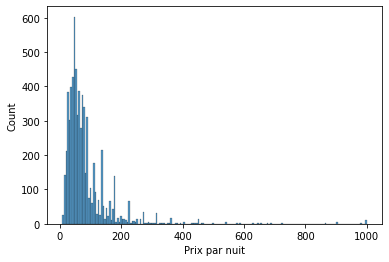

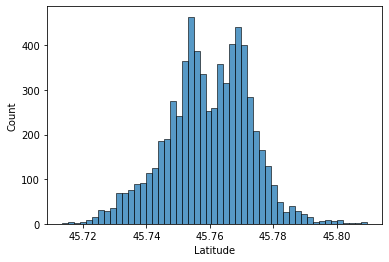

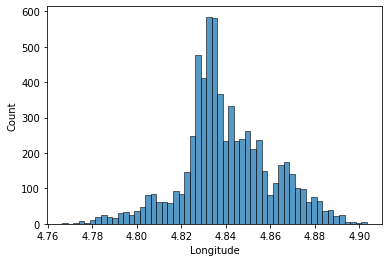

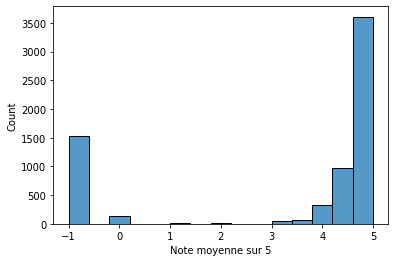

In [45]:
# Distribution par variable
for col in df.select_dtypes('float'):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col])

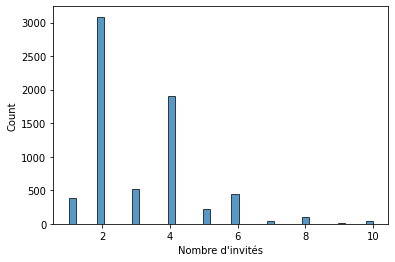

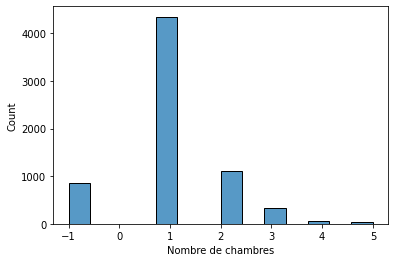

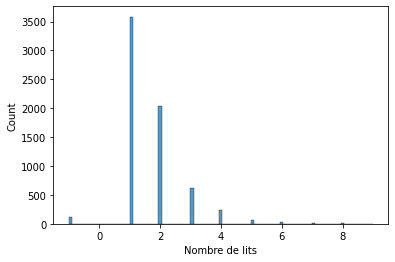

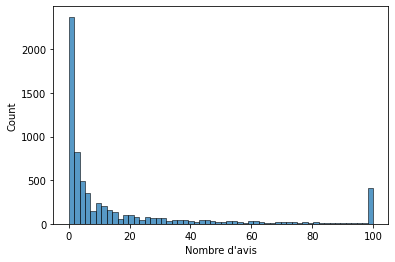

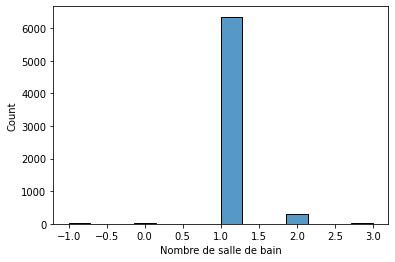

In [46]:
# Distribution par variable
for col in df.select_dtypes('integer'):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col])

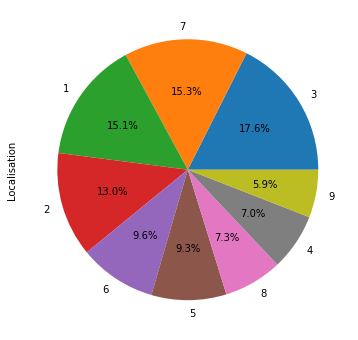

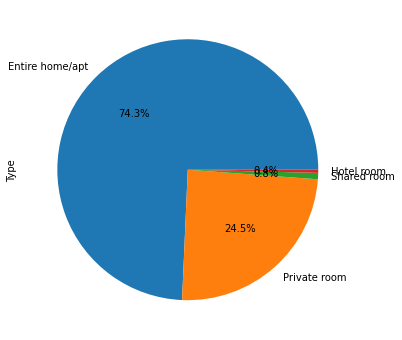

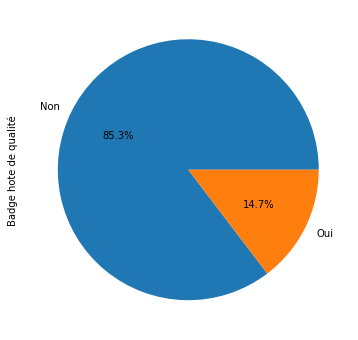

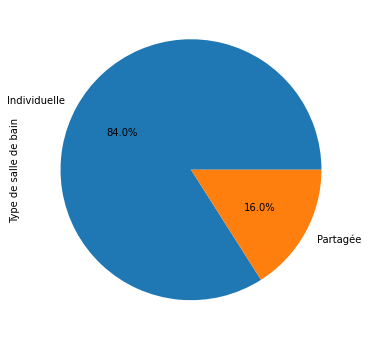

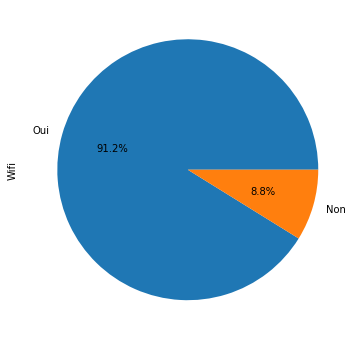

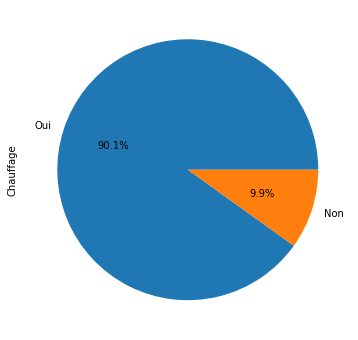

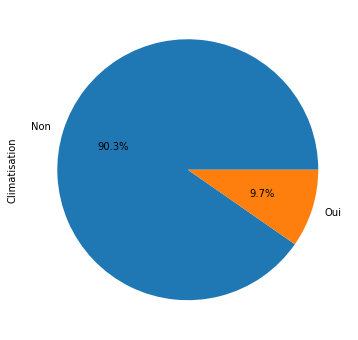

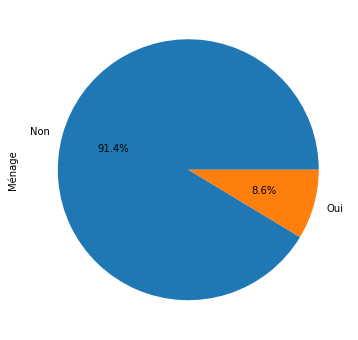

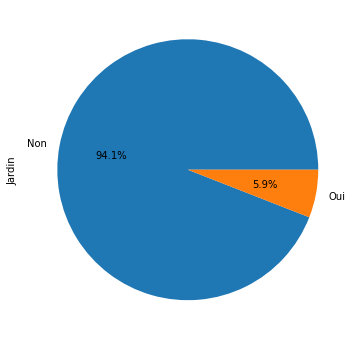

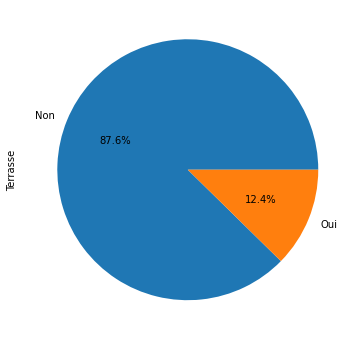

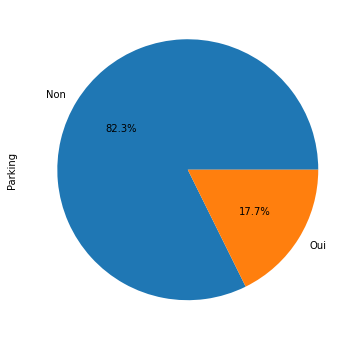

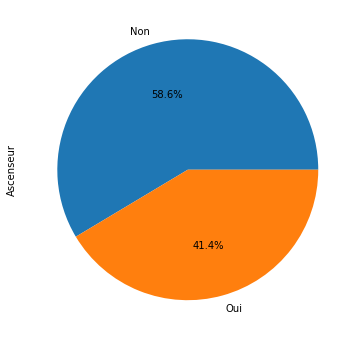

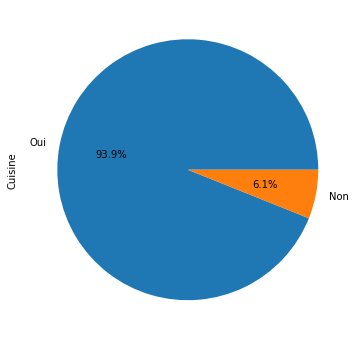

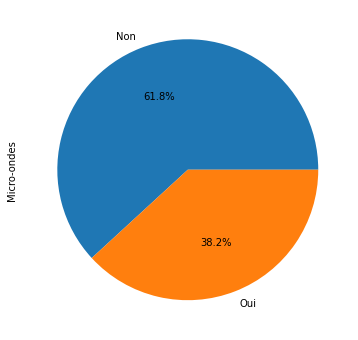

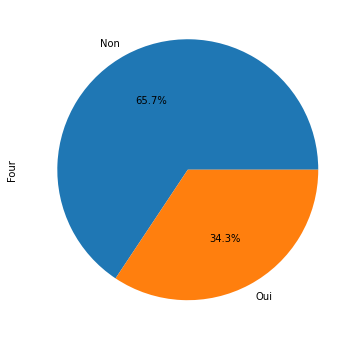

In [47]:
# Distribution par variable
for col in df.select_dtypes('object'):
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot.pie(autopct = lambda x: str(round(x, 1)) + '%')

Text(0.5, 1.0, "Nombre d'avis")

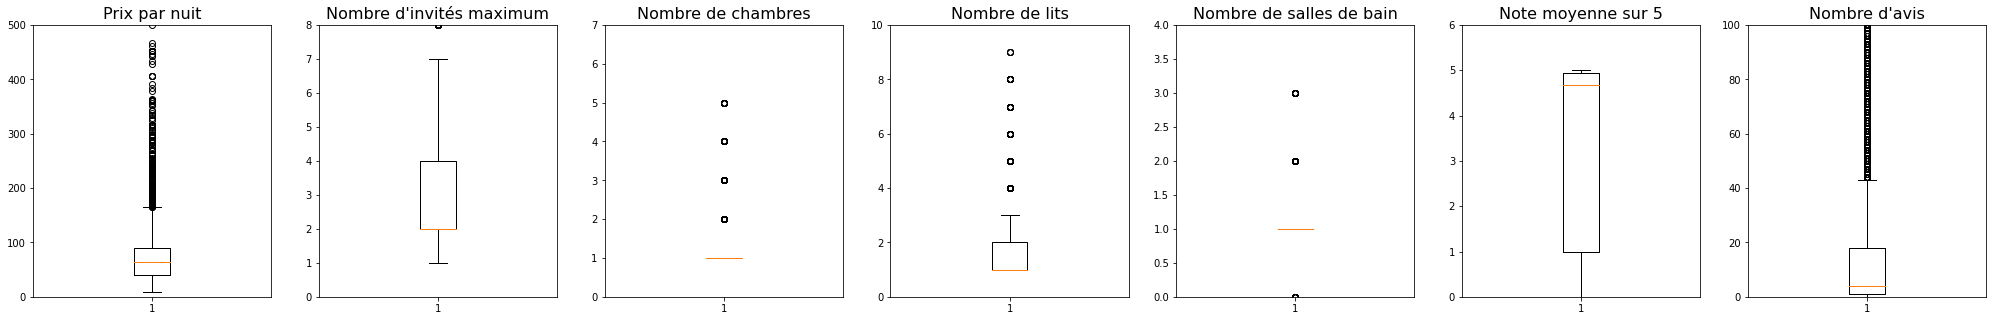

In [48]:
# Distribution des variables numériques
fig, axes = plt.subplots(1,7) # Nombre de graphique dans la figure
fig.set_size_inches(35,5) # Taille de la figure

axes[0].boxplot(df["Prix par nuit"]) 
axes[0].set_ylim(0,500)
axes[0].set_title("Prix par nuit", loc= 'center', fontsize=16)

axes[1].boxplot(df["Nombre d'invités"]) 
axes[1].set_ylim(0,8)
axes[1].set_title("Nombre d'invités maximum", loc= 'center', fontsize=16)

axes[2].boxplot(df["Nombre de chambres"]) 
axes[2].set_ylim(0,7)
axes[2].set_title("Nombre de chambres", loc= 'center', fontsize=16)

axes[3].boxplot(df["Nombre de lits"]) 
axes[3].set_ylim(0,10)
axes[3].set_title("Nombre de lits", loc= 'center', fontsize=16)

axes[4].boxplot(df["Nombre de salle de bain"]) 
axes[4].set_ylim(0,4)
axes[4].set_title("Nombre de salles de bain", loc= 'center', fontsize=16)

axes[5].boxplot(df["Note moyenne sur 5"]) 
axes[5].set_ylim(0,6)
axes[5].set_title("Note moyenne sur 5", loc= 'center', fontsize=16)

axes[6].boxplot(df["Nombre d'avis"]) 
axes[6].set_ylim(0,100)
axes[6].set_title("Nombre d'avis", loc= 'center', fontsize=16)

---
<h3><center> Corrélations entre les variables </center></h3>

interval columns not set, guessing: ['Prix par nuit', 'Latitude', 'Longitude', "Nombre d'invités", 'Nombre de chambres', 'Nombre de lits', 'Note moyenne sur 5', "Nombre d'avis", 'Nombre de salle de bain']
interval columns not set, guessing: ['Prix par nuit', 'Latitude', 'Longitude', "Nombre d'invités", 'Nombre de chambres', 'Nombre de lits', 'Note moyenne sur 5', "Nombre d'avis", 'Nombre de salle de bain']
interval columns not set, guessing: ['Prix par nuit', 'Latitude', 'Longitude', "Nombre d'invités", 'Nombre de chambres', 'Nombre de lits', 'Note moyenne sur 5', "Nombre d'avis", 'Nombre de salle de bain']


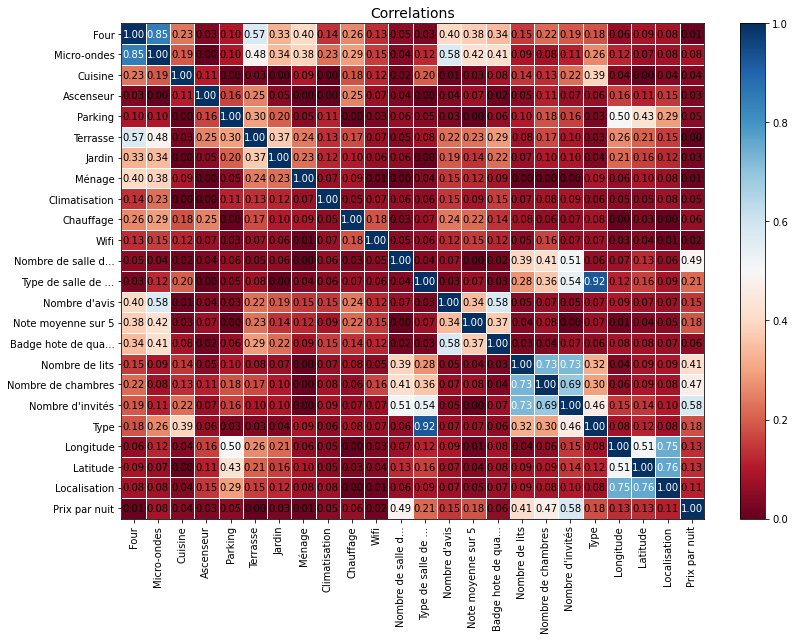

In [49]:
# Corrélations entre les variables
import phik
from phik.report import plot_correlation_matrix
from phik import report

plot_correlation_matrix(df.phik_matrix().values, 
                        x_labels=df.phik_matrix().columns, 
                        y_labels=df.phik_matrix().index, 
                        vmin=0, vmax=1, color_map="RdBu", 
                        title=r"Correlations", 
                        fontsize_factor=1, 
                        figsize=(12, 9))
plt.show()

Regardons la corrélation du prix par nuit avec les autres variables.

Si la corrélation est supérieure à 0.1, nous la regardons en détail. Il s'agit des variables : 
- Localisation
- Type
- Nombre d'invités (élevé)
- Nombre de chambres (élevé)
- Nombre de lits (élevé)
- Note moyenne sur 5
- Nombre d'avis
- Type de salle de bain
- Nombre de salle de bain (élevé)

Longitude                  0.046096
Latitude                   0.073397
Nombre d'avis              0.094780
Nombre de salle de bain    0.178903
Note moyenne sur 5         0.190497
Nombre de chambres         0.358706
Nombre de lits             0.400579
Nombre d'invités           0.474749
Prix par nuit              1.000000
Name: Prix par nuit, dtype: float64


<AxesSubplot:>

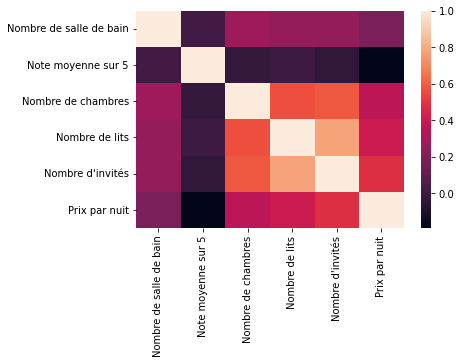

In [50]:
# Heatmap des corrélations avec Prix par nuit
corrmat = df.corr()
sorted_corrs = corrmat['Prix par nuit'].abs().sort_values()
print(sorted_corrs)
strong_corrs = sorted_corrs[sorted_corrs >= 0.1]
corrmat = df[strong_corrs.index].corr()
sns.heatmap(corrmat)

---
<h3><center> Relations entre variables </center></h3>

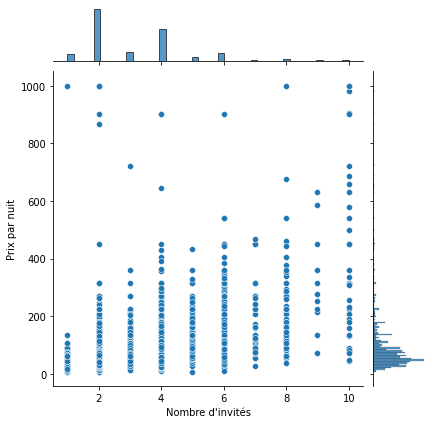

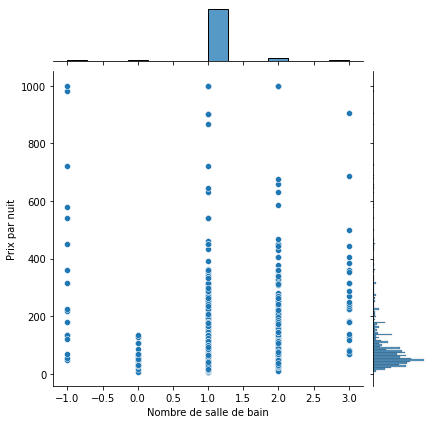

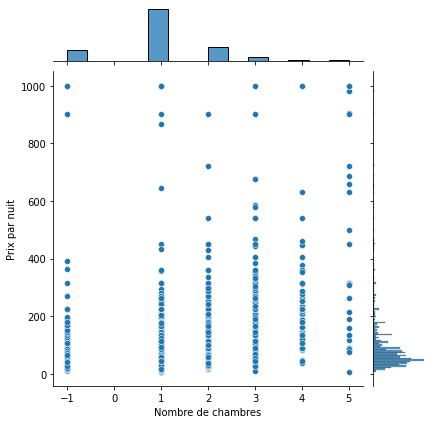

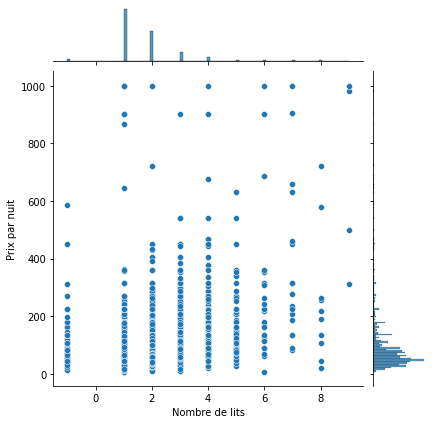

In [51]:
# Prix par nuit en fonction du nombre d'invités
sns.jointplot(data=df, x="Nombre d'invités", y="Prix par nuit")
plt.show()

# Prix par nuit en fonction du nombre de salles de bain
sns.jointplot(data=df, x="Nombre de salle de bain", y="Prix par nuit")
plt.show()

# Prix par nuit en fonction du nombre de salles de bain
sns.jointplot(data=df, x="Nombre de chambres", y="Prix par nuit")
plt.show()

# Prix par nuit en fonction du nombre de lits
sns.jointplot(data=df, x="Nombre de lits", y="Prix par nuit")
plt.show()

---
<h3><center> Heatmap </center></h3>

In [52]:
tabledf1 = pd.pivot_table(df,index=["Nombre de salle de bain"],columns=["Nombre d'invités"],values=['Prix par nuit'],aggfunc=np.mean)
tabledf1

Prix par nuit                                     \
Nombre d'invités                   1           2          3           4    
Nombre de salle de bain                                                    
-1                                NaN  116.060000        NaN   67.740000   
 0                          32.816667   61.818889  49.225000   63.373333   
 1                          36.862933   61.564544  74.588641   90.505123   
 2                          34.621667   62.110333  84.300000  131.791667   
 3                                NaN   80.380000        NaN         NaN   

                                                                         \
Nombre d'invités                 5           6           7           8    
Nombre de salle de bain                                                   
-1                              NaN  219.025000         NaN  287.398000   
 0                        85.800000         NaN         NaN  108.380000   
 1                       108.005161  141.601085  161.707308  169.557083   
 2                       149.677500  165.833810  226.161333  268.014667   
 3                              NaN  250.367000  180.640000  228.329000   

                                                 
Nombre d'invités                 9           10  
Nombre de salle de bain                          
-1                              NaN  746.978000  
 0                              NaN         NaN  
 1                       266.445000  264.073750  
 2                       351.217143  363.043571  
 3                              NaN  601.755000

In [53]:
tabledf2 = pd.pivot_table(df,index=["Nombre de salle de bain"],columns=["Nombre de chambres"],values=['Prix par nuit'],aggfunc=np.mean)
tabledf2

Prix par nuit                                      \
Nombre de chambres                 -1           1           2           3   
Nombre de salle de bain                                                     
-1                          85.803333  137.285000         NaN  447.985000   
 0                          46.740000   62.855556         NaN         NaN   
 1                          62.926047   67.425464  109.060020  158.236545   
 2                          44.408333   56.357143  145.116703  202.625876   
 3                          80.380000         NaN  139.090000  233.627500   

                                                 
Nombre de chambres                4           5  
Nombre de salle de bain                          
-1                       259.820000  788.760000  
 0                              NaN         NaN  
 1                       224.107500  433.310000  
 2                       226.097750  290.519286  
 3                       286.701429  434.288333

In [54]:
tabledf3 = pd.pivot_table(df,index=["Nombre de lits"],columns=["Nombre de chambres"],values=['Prix par nuit'],aggfunc=np.mean)
tabledf3

Prix par nuit                                      \
Nombre de chambres            -1           1           2           3   
Nombre de lits                                                         
-1                     60.561579   77.127640  121.932000  275.250000   
 1                     62.472960   61.694047   81.161200  112.900000   
 2                     63.524925   78.509297  107.955421  131.687333   
 3                     59.911667   73.570198  118.256839  168.281366   
 4                    139.995000   94.874583  133.626494  173.127788   
 5                           NaN   63.675000   95.740000  191.982941   
 6                           NaN  131.865000  187.113333  289.950000   
 7                           NaN         NaN         NaN  183.350000   
 8                           NaN  115.306667   45.160000  420.890000   
 9                           NaN         NaN         NaN         NaN   

                                            
Nombre de chambres           4           5  
Nombre de lits                              
-1                  310.700000         NaN  
 1                         NaN         NaN  
 2                  180.640000         NaN  
 3                  139.545000         NaN  
 4                  238.694231         NaN  
 5                  253.518125  157.544286  
 6                  196.354000  367.602857  
 7                  249.735000  522.407500  
 8                  195.090000  456.115000  
 9                         NaN  698.440000

In [55]:
tabledf4 = pd.pivot_table(df,index=["Nombre d'invités"],columns=["Nombre de chambres"],values=['Prix par nuit'],aggfunc=np.mean)
tabledf4

Prix par nuit                                      \
Nombre de chambres            -1           1           2           3   
Nombre d'invités                                                       
1                      39.359111   36.304685   40.643333   49.076667   
2                      61.467315   61.505655   66.578286  137.060000   
3                      56.546230   73.552822   91.173516   57.203333   
4                      79.517402   84.507872  107.405931  109.644474   
5                            NaN   96.141111  107.051750  140.560000   
6                     102.962500   95.680323  138.035892  178.157823   
7                            NaN         NaN  119.572778  269.047647   
8                            NaN  162.575000  110.040000  196.031020   
9                            NaN         NaN  316.120000  334.185000   
10                           NaN   47.420000  197.080000  355.605000   

                                            
Nombre de chambres           4           5  
Nombre d'invités                            
1                          NaN         NaN  
2                          NaN         NaN  
3                          NaN         NaN  
4                   180.640000         NaN  
5                   129.610000    8.130000  
6                   172.164615   85.800000  
7                   189.672000   94.536667  
8                   288.193704  243.865000  
9                   380.700000  174.320000  
10                  190.754000  579.978824

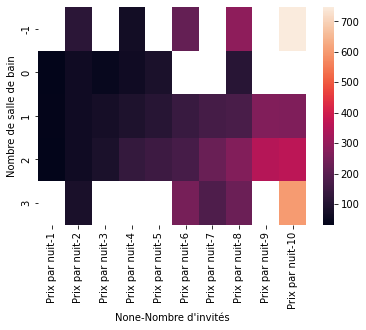

In [56]:
axes[0] = sns.heatmap(tabledf1)

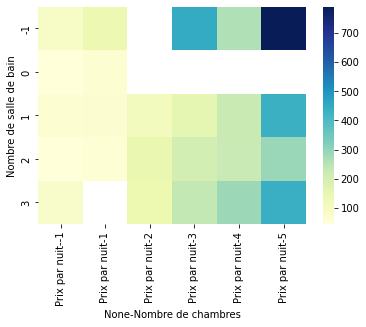

In [57]:
axes[1] = sns.heatmap(tabledf2, cmap="YlGnBu")

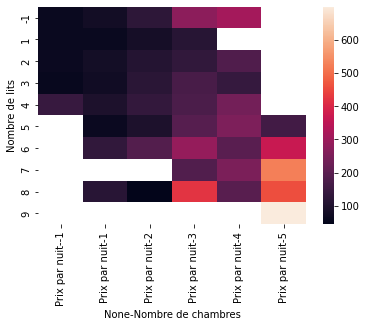

In [58]:
axes[2] = sns.heatmap(tabledf3)

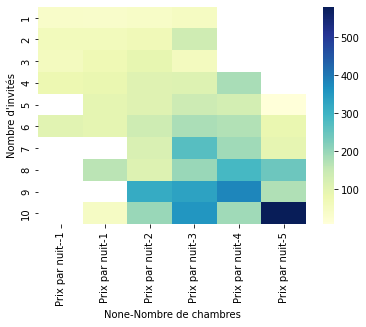

In [59]:
axes[3] = sns.heatmap(tabledf4, cmap="YlGnBu")

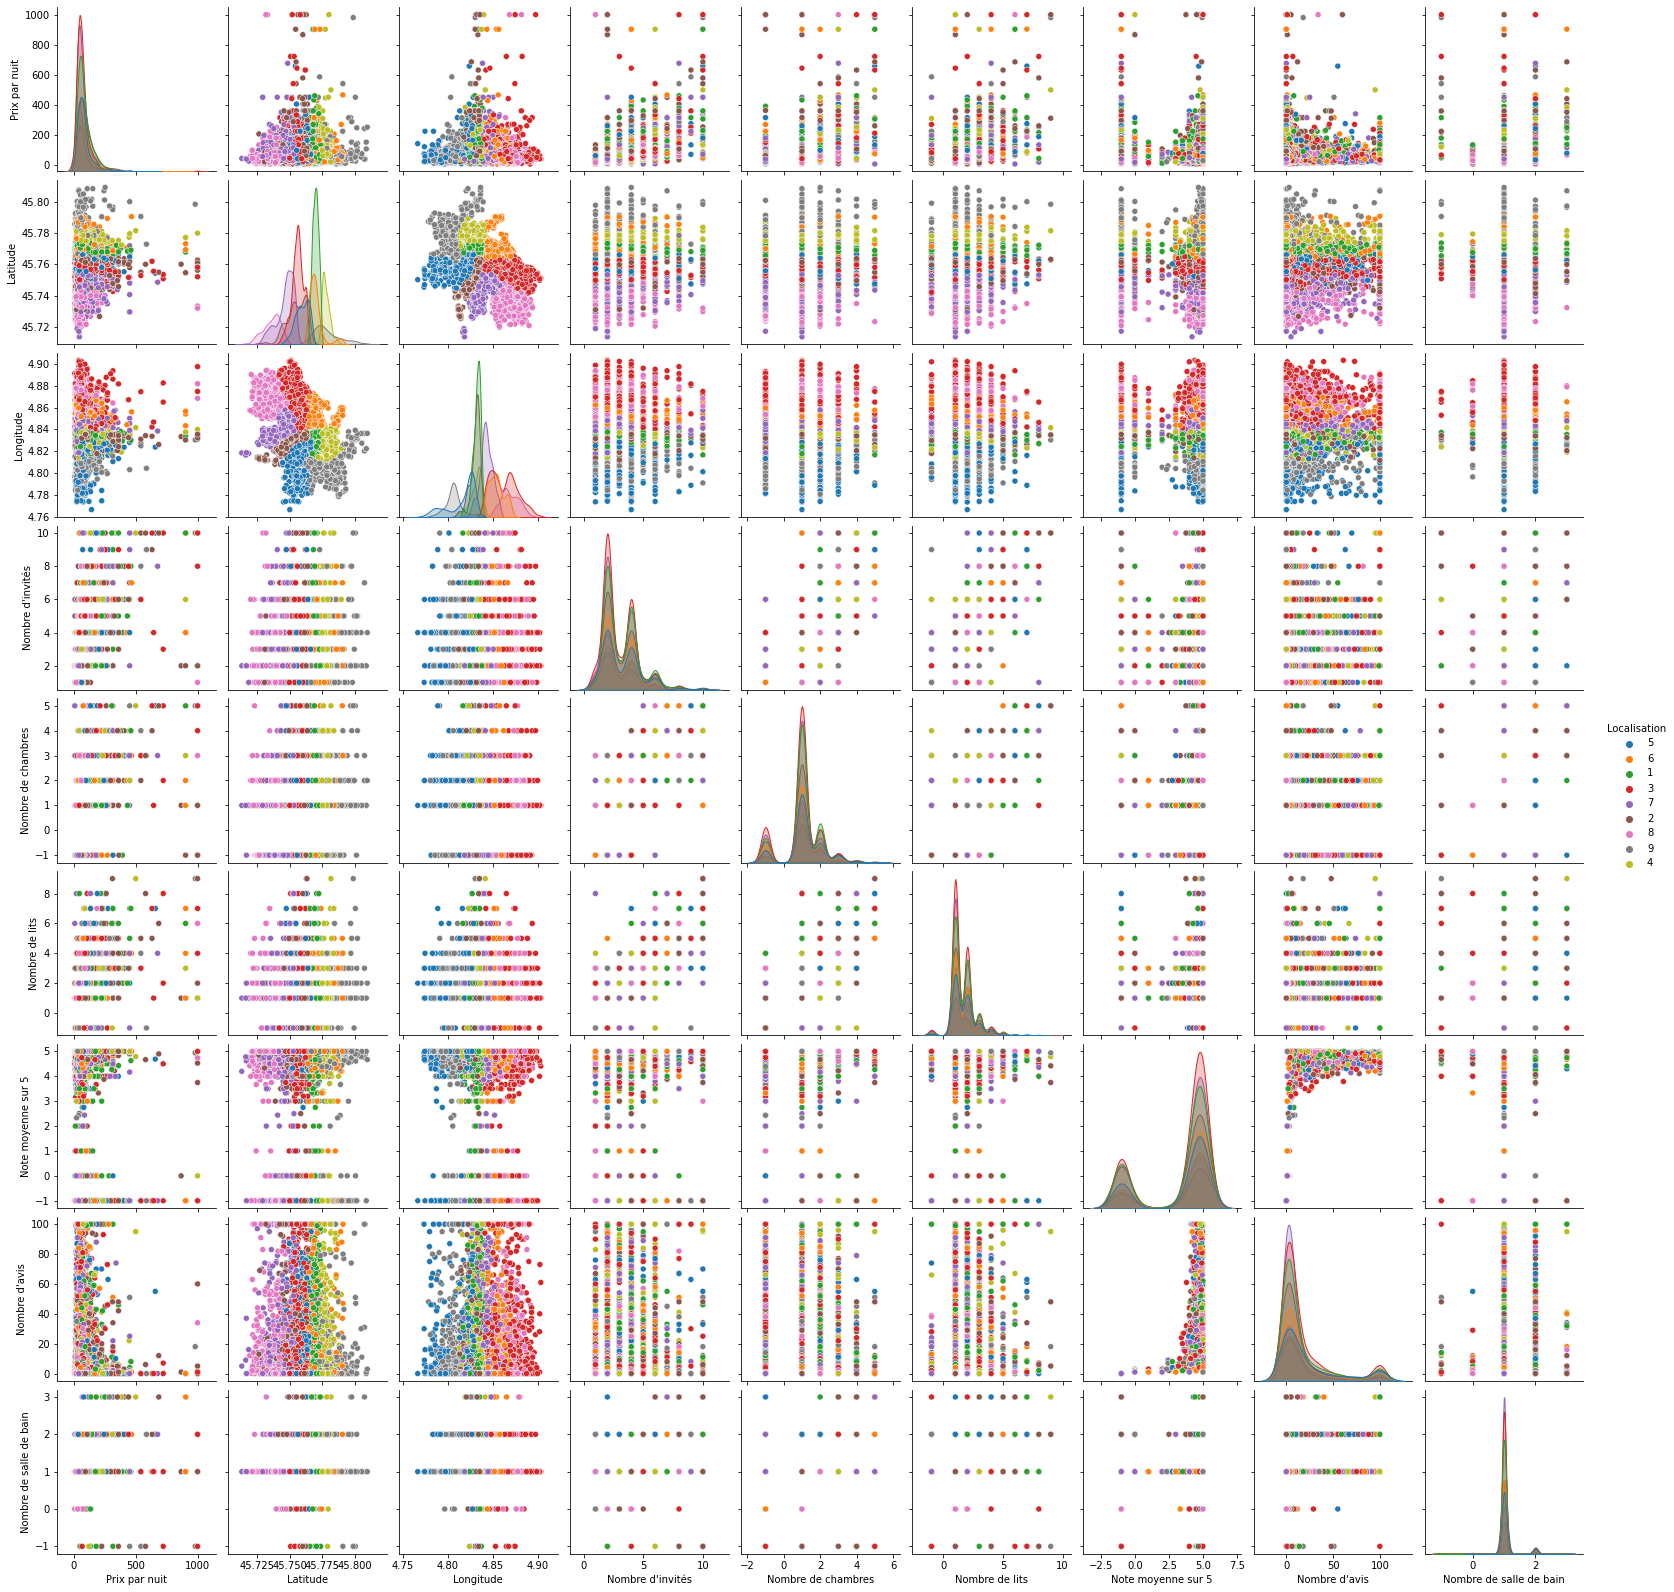

In [60]:
sns.pairplot(df, hue='Localisation')